In [1]:
##Import area
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [2]:
def generating_submission_csv(prediction, name=""):
    data = {'Id': [k+1 for k in range(len(prediction))], 'Cover_type': prediction}

    # Créez un DataFrame Pandas à partir du dictionnaire
    predictions_df = pd.DataFrame(data)

    # Enregistrez le DataFrame dans un fichier CSV
    predictions_df.to_csv('predictions_'+name+'.csv', index=False)

In [3]:
# Charger les données depuis un fichier CSV
data = pd.read_csv('data/train.csv')
id = data['Id']
data = data.drop('Id', axis=1)
cover_type = data['Cover_Type']
data = data.drop('Cover_Type', axis=1)

print(data.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2881     130     22                               210   
1       3005     351     14                               242   
2       3226      63     14                               618   
3       3298     317      8                               661   
4       3080      35      6                               175   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              54                             1020   
1                             -16                             1371   
2                               2                             1092   
3                              60                              752   
4                              26                             3705   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            250             221             88   
1            194             215            159   
2            232             210   

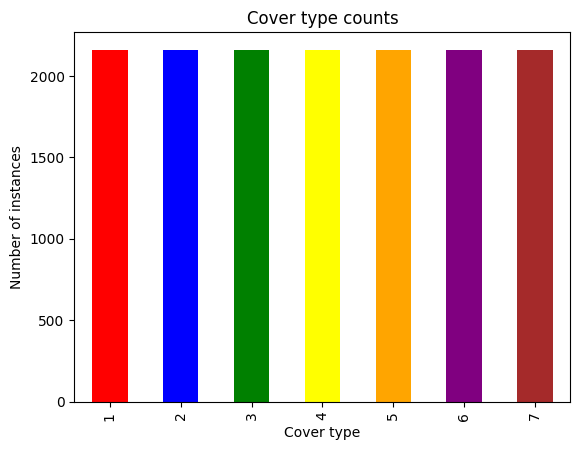

In [4]:
cover_type.value_counts().plot(kind='bar', color=['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown'])
plt.ylabel('Number of instances')
plt.xlabel('Cover type')
plt.title('Cover type counts')
plt.show()

Columns with numerical data are Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points

In [5]:
raw_col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
##Normalisation between 0 and 1
for col in raw_col:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

print(data.head())


   Elevation    Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   0.508870  0.361111   0.44                          0.152616   
1   0.571718  0.975000   0.28                          0.175872   
2   0.683730  0.175000   0.28                          0.449128   
3   0.720223  0.880556   0.16                          0.480378   
4   0.609731  0.097222   0.12                          0.127180   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.268085                         0.149934   
1                        0.168794                         0.201529   
2                        0.194326                         0.160517   
3                        0.276596                         0.110539   
4                        0.228369                         0.544613   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.980198        0.787097       0.350598   
1       0.702970        0.748387       0.633466   
2       0.891089       

In [29]:
k = 25
selector = SelectKBest(chi2, k=k)
z = selector.fit_transform(data, cover_type)
filter = selector.get_support()

print("Selected "+str(k)+" features :")
print(data.columns[filter])

Selected 25 features :
Index(['Elevation', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type6',
       'Soil_Type10', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type17', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29',
       'Soil_Type30', 'Soil_Type32', 'Soil_Type35', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
import itertools
from sklearn.model_selection import train_test_split
from tqdm import tqdm

k_features = [k for k in range(15, 55)]
n_estimators = [50,100,150,200]
max_depth = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]

best_params = {'k_f': 0, 'accuracy': 0, 'n_e': 0, 'm_d': 0}

cartesian_product = list(itertools.product(k_features, n_estimators, max_depth))


for params in tqdm(cartesian_product):
    k, n_e, m_d = params
    selector = SelectKBest(chi2, k=k)
    z = selector.fit_transform(data, cover_type)
    data_filtered = data[data.columns[selector.get_support()]]

    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, cover_type, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=n_e, max_depth=m_d, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_params['accuracy']:
        best_params['k_f'] = k
        best_params['accuracy'] = accuracy
        best_params['n_e'] = n_e
        best_params['m_d'] = m_d
        print("New best params with accuracy  = "+ str(accuracy) +":")
        print(best_params)


  0%|          | 2/2240 [00:00<05:45,  6.48it/s]

New best params with accuracy  = 0.47255291005291006:
{'k_f': 15, 'accuracy': 0.47255291005291006, 'n_e': 50, 'm_d': 1}
New best params with accuracy  = 0.593584656084656:
{'k_f': 15, 'accuracy': 0.593584656084656, 'n_e': 50, 'm_d': 2}


  0%|          | 3/2240 [00:00<06:10,  6.03it/s]

New best params with accuracy  = 0.6084656084656085:
{'k_f': 15, 'accuracy': 0.6084656084656085, 'n_e': 50, 'm_d': 3}


  0%|          | 5/2240 [00:00<07:16,  5.12it/s]

New best params with accuracy  = 0.6451719576719577:
{'k_f': 15, 'accuracy': 0.6451719576719577, 'n_e': 50, 'm_d': 4}
New best params with accuracy  = 0.6587301587301587:
{'k_f': 15, 'accuracy': 0.6587301587301587, 'n_e': 50, 'm_d': 5}


  0%|          | 6/2240 [00:01<07:44,  4.81it/s]

New best params with accuracy  = 0.6689814814814815:
{'k_f': 15, 'accuracy': 0.6689814814814815, 'n_e': 50, 'm_d': 6}


  0%|          | 7/2240 [00:01<08:19,  4.47it/s]

New best params with accuracy  = 0.6729497354497355:
{'k_f': 15, 'accuracy': 0.6729497354497355, 'n_e': 50, 'm_d': 7}


  0%|          | 8/2240 [00:01<09:21,  3.97it/s]

New best params with accuracy  = 0.6792328042328042:
{'k_f': 15, 'accuracy': 0.6792328042328042, 'n_e': 50, 'm_d': 8}


  0%|          | 9/2240 [00:02<10:04,  3.69it/s]

New best params with accuracy  = 0.6795634920634921:
{'k_f': 15, 'accuracy': 0.6795634920634921, 'n_e': 50, 'm_d': 9}


  0%|          | 10/2240 [00:02<10:48,  3.44it/s]

New best params with accuracy  = 0.6815476190476191:
{'k_f': 15, 'accuracy': 0.6815476190476191, 'n_e': 50, 'm_d': 10}


  1%|          | 24/2240 [00:07<15:29,  2.38it/s]

New best params with accuracy  = 0.6828703703703703:
{'k_f': 15, 'accuracy': 0.6828703703703703, 'n_e': 100, 'm_d': 10}


  6%|▌         | 135/2240 [01:09<15:16,  2.30it/s]

New best params with accuracy  = 0.6851851851851852:
{'k_f': 17, 'accuracy': 0.6851851851851852, 'n_e': 100, 'm_d': 9}


  8%|▊         | 176/2240 [01:36<09:55,  3.47it/s]

New best params with accuracy  = 0.6878306878306878:
{'k_f': 18, 'accuracy': 0.6878306878306878, 'n_e': 50, 'm_d': 8}


  9%|▉         | 205/2240 [01:49<18:46,  1.81it/s]

New best params with accuracy  = 0.6888227513227513:
{'k_f': 18, 'accuracy': 0.6888227513227513, 'n_e': 150, 'm_d': 9}


 10%|▉         | 219/2240 [01:59<24:44,  1.36it/s]

New best params with accuracy  = 0.6904761904761905:
{'k_f': 18, 'accuracy': 0.6904761904761905, 'n_e': 200, 'm_d': 9}


 11%|█         | 248/2240 [02:13<14:21,  2.31it/s]

New best params with accuracy  = 0.6908068783068783:
{'k_f': 19, 'accuracy': 0.6908068783068783, 'n_e': 100, 'm_d': 10}


 13%|█▎        | 289/2240 [02:39<09:05,  3.58it/s]

New best params with accuracy  = 0.6954365079365079:
{'k_f': 20, 'accuracy': 0.6954365079365079, 'n_e': 50, 'm_d': 9}


 14%|█▎        | 303/2240 [02:44<12:45,  2.53it/s]

New best params with accuracy  = 0.7000661375661376:
{'k_f': 20, 'accuracy': 0.7000661375661376, 'n_e': 100, 'm_d': 9}


 15%|█▌        | 343/2240 [03:10<10:07,  3.12it/s]

New best params with accuracy  = 0.7136243386243386:
{'k_f': 21, 'accuracy': 0.7136243386243386, 'n_e': 50, 'm_d': 7}


 15%|█▌        | 344/2240 [03:10<10:01,  3.15it/s]

New best params with accuracy  = 0.7195767195767195:
{'k_f': 21, 'accuracy': 0.7195767195767195, 'n_e': 50, 'm_d': 8}


 15%|█▌        | 345/2240 [03:11<10:07,  3.12it/s]

New best params with accuracy  = 0.7407407407407407:
{'k_f': 21, 'accuracy': 0.7407407407407407, 'n_e': 50, 'm_d': 9}


 15%|█▌        | 346/2240 [03:11<10:21,  3.05it/s]

New best params with accuracy  = 0.7490079365079365:
{'k_f': 21, 'accuracy': 0.7490079365079365, 'n_e': 50, 'm_d': 10}


 15%|█▌        | 347/2240 [03:11<11:37,  2.71it/s]

New best params with accuracy  = 0.7711640211640212:
{'k_f': 21, 'accuracy': 0.7711640211640212, 'n_e': 50, 'm_d': 15}


 16%|█▌        | 348/2240 [03:12<12:25,  2.54it/s]

New best params with accuracy  = 0.7728174603174603:
{'k_f': 21, 'accuracy': 0.7728174603174603, 'n_e': 50, 'm_d': 20}


 16%|█▌        | 361/2240 [03:18<18:00,  1.74it/s]

New best params with accuracy  = 0.7757936507936508:
{'k_f': 21, 'accuracy': 0.7757936507936508, 'n_e': 100, 'm_d': 15}


 17%|█▋        | 375/2240 [03:27<25:17,  1.23it/s]

New best params with accuracy  = 0.7761243386243386:
{'k_f': 21, 'accuracy': 0.7761243386243386, 'n_e': 150, 'm_d': 15}


 21%|██        | 473/2240 [04:27<15:41,  1.88it/s]

New best params with accuracy  = 0.7771164021164021:
{'k_f': 23, 'accuracy': 0.7771164021164021, 'n_e': 100, 'm_d': 15}


 21%|██        | 474/2240 [04:28<17:55,  1.64it/s]

New best params with accuracy  = 0.7781084656084656:
{'k_f': 23, 'accuracy': 0.7781084656084656, 'n_e': 100, 'm_d': 20}


 24%|██▎       | 530/2240 [05:02<17:53,  1.59it/s]

New best params with accuracy  = 0.779431216931217:
{'k_f': 24, 'accuracy': 0.779431216931217, 'n_e': 100, 'm_d': 20}


 25%|██▌       | 571/2240 [05:29<09:29,  2.93it/s]

New best params with accuracy  = 0.781084656084656:
{'k_f': 25, 'accuracy': 0.781084656084656, 'n_e': 50, 'm_d': 15}


 26%|██▌       | 586/2240 [05:37<17:36,  1.57it/s]

New best params with accuracy  = 0.7840608465608465:
{'k_f': 25, 'accuracy': 0.7840608465608465, 'n_e': 100, 'm_d': 20}


 27%|██▋       | 600/2240 [05:46<25:12,  1.08it/s]

New best params with accuracy  = 0.7843915343915344:
{'k_f': 25, 'accuracy': 0.7843915343915344, 'n_e': 150, 'm_d': 20}


 29%|██▊       | 642/2240 [06:12<18:31,  1.44it/s]

New best params with accuracy  = 0.7857142857142857:
{'k_f': 26, 'accuracy': 0.7857142857142857, 'n_e': 100, 'm_d': 20}


 29%|██▉       | 656/2240 [06:22<24:25,  1.08it/s]

New best params with accuracy  = 0.7870370370370371:
{'k_f': 26, 'accuracy': 0.7870370370370371, 'n_e': 150, 'm_d': 20}


 30%|███       | 683/2240 [06:41<10:50,  2.39it/s]

New best params with accuracy  = 0.8181216931216931:
{'k_f': 27, 'accuracy': 0.8181216931216931, 'n_e': 50, 'm_d': 15}


 31%|███       | 684/2240 [06:42<11:34,  2.24it/s]

New best params with accuracy  = 0.8323412698412699:
{'k_f': 27, 'accuracy': 0.8323412698412699, 'n_e': 50, 'm_d': 20}


 31%|███       | 686/2240 [06:43<12:46,  2.03it/s]

New best params with accuracy  = 0.8343253968253969:
{'k_f': 27, 'accuracy': 0.8343253968253969, 'n_e': 50, 'm_d': 30}


 31%|███▏      | 700/2240 [06:51<20:59,  1.22it/s]

New best params with accuracy  = 0.8353174603174603:
{'k_f': 27, 'accuracy': 0.8353174603174603, 'n_e': 100, 'm_d': 30}


 33%|███▎      | 741/2240 [07:23<11:25,  2.19it/s]

New best params with accuracy  = 0.8376322751322751:
{'k_f': 28, 'accuracy': 0.8376322751322751, 'n_e': 50, 'm_d': 25}


 38%|███▊      | 851/2240 [08:40<09:17,  2.49it/s]

New best params with accuracy  = 0.8449074074074074:
{'k_f': 30, 'accuracy': 0.8449074074074074, 'n_e': 50, 'm_d': 15}


 38%|███▊      | 852/2240 [08:40<10:10,  2.27it/s]

New best params with accuracy  = 0.8581349206349206:
{'k_f': 30, 'accuracy': 0.8581349206349206, 'n_e': 50, 'm_d': 20}


 38%|███▊      | 853/2240 [08:41<10:57,  2.11it/s]

New best params with accuracy  = 0.8587962962962963:
{'k_f': 30, 'accuracy': 0.8587962962962963, 'n_e': 50, 'm_d': 25}


 38%|███▊      | 854/2240 [08:41<11:25,  2.02it/s]

New best params with accuracy  = 0.8630952380952381:
{'k_f': 30, 'accuracy': 0.8630952380952381, 'n_e': 50, 'm_d': 30}


 39%|███▉      | 868/2240 [08:50<19:16,  1.19it/s]

New best params with accuracy  = 0.8654100529100529:
{'k_f': 30, 'accuracy': 0.8654100529100529, 'n_e': 100, 'm_d': 30}


 43%|████▎     | 953/2240 [09:57<24:54,  1.16s/it]

New best params with accuracy  = 0.8673941798941799:
{'k_f': 31, 'accuracy': 0.8673941798941799, 'n_e': 200, 'm_d': 30}


 46%|████▋     | 1036/2240 [10:49<16:27,  1.22it/s]

New best params with accuracy  = 0.8687169312169312:
{'k_f': 33, 'accuracy': 0.8687169312169312, 'n_e': 100, 'm_d': 30}


 58%|█████▊    | 1301/2240 [14:01<07:53,  1.98it/s]

New best params with accuracy  = 0.8697089947089947:
{'k_f': 38, 'accuracy': 0.8697089947089947, 'n_e': 50, 'm_d': 25}


 62%|██████▏   | 1399/2240 [15:18<21:51,  1.56s/it]

New best params with accuracy  = 0.8700396825396826:
{'k_f': 39, 'accuracy': 0.8700396825396826, 'n_e': 200, 'm_d': 25}


 63%|██████▎   | 1414/2240 [15:25<07:16,  1.89it/s]

New best params with accuracy  = 0.873015873015873:
{'k_f': 40, 'accuracy': 0.873015873015873, 'n_e': 50, 'm_d': 30}


 64%|██████▍   | 1428/2240 [15:34<12:36,  1.07it/s]

New best params with accuracy  = 0.875:
{'k_f': 40, 'accuracy': 0.875, 'n_e': 100, 'm_d': 30}


100%|██████████| 2240/2240 [27:20<00:00,  1.37it/s]


it is boundary adding precision

In [12]:
k_features = [k for k in range(35, 45)]
n_estimators = [76,77,78,79,80,81,82,83,84]
max_depth = [30,31,32,33,34,35]

best_params_bis = {'k_f': 0, 'accuracy': 0, 'n_e': 0, 'm_d': 0}


cartesian_product = list(itertools.product(k_features, n_estimators, max_depth))


for params in tqdm(cartesian_product):
    k, n_e, m_d = params
    selector = SelectKBest(chi2, k=k)
    z = selector.fit_transform(data, cover_type)
    data_filtered = data[data.columns[selector.get_support()]]

    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, cover_type, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=n_e, max_depth=m_d, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_params_bis['accuracy']:
        best_params_bis['k_f'] = k
        best_params_bis['accuracy'] = accuracy
        best_params_bis['n_e'] = n_e
        best_params_bis['m_d'] = m_d
        print("New best params with accuracy  = "+ str(accuracy) +":")
        print(best_params_bis)


  0%|          | 1/540 [00:00<06:53,  1.30it/s]

New best params with accuracy  = 0.8624338624338624:
{'k_f': 35, 'accuracy': 0.8624338624338624, 'n_e': 76, 'm_d': 30}


  0%|          | 2/540 [00:01<06:47,  1.32it/s]

New best params with accuracy  = 0.8647486772486772:
{'k_f': 35, 'accuracy': 0.8647486772486772, 'n_e': 76, 'm_d': 31}


  1%|          | 4/540 [00:03<06:46,  1.32it/s]

New best params with accuracy  = 0.8670634920634921:
{'k_f': 35, 'accuracy': 0.8670634920634921, 'n_e': 76, 'm_d': 33}


  3%|▎         | 16/540 [00:11<06:37,  1.32it/s]

New best params with accuracy  = 0.8680555555555556:
{'k_f': 35, 'accuracy': 0.8680555555555556, 'n_e': 78, 'm_d': 33}


 10%|█         | 56/540 [00:43<06:23,  1.26it/s]

New best params with accuracy  = 0.871031746031746:
{'k_f': 36, 'accuracy': 0.871031746031746, 'n_e': 76, 'm_d': 31}


 11%|█         | 58/540 [00:44<06:21,  1.26it/s]

New best params with accuracy  = 0.8713624338624338:
{'k_f': 36, 'accuracy': 0.8713624338624338, 'n_e': 76, 'm_d': 33}


 11%|█▏        | 62/540 [00:47<06:17,  1.27it/s]

New best params with accuracy  = 0.8716931216931217:
{'k_f': 36, 'accuracy': 0.8716931216931217, 'n_e': 77, 'm_d': 31}


 50%|█████     | 271/540 [03:44<03:50,  1.17it/s]

New best params with accuracy  = 0.8723544973544973:
{'k_f': 40, 'accuracy': 0.8723544973544973, 'n_e': 76, 'm_d': 30}


 50%|█████     | 272/540 [03:45<03:49,  1.17it/s]

New best params with accuracy  = 0.8746693121693122:
{'k_f': 40, 'accuracy': 0.8746693121693122, 'n_e': 76, 'm_d': 31}


 51%|█████     | 274/540 [03:47<03:46,  1.17it/s]

New best params with accuracy  = 0.875:
{'k_f': 40, 'accuracy': 0.875, 'n_e': 76, 'm_d': 33}


 51%|█████▏    | 278/540 [03:50<03:39,  1.19it/s]

New best params with accuracy  = 0.8763227513227513:
{'k_f': 40, 'accuracy': 0.8763227513227513, 'n_e': 77, 'm_d': 31}


 55%|█████▌    | 298/540 [04:07<03:28,  1.16it/s]

New best params with accuracy  = 0.8773148148148148:
{'k_f': 40, 'accuracy': 0.8773148148148148, 'n_e': 80, 'm_d': 33}


100%|██████████| 540/540 [07:55<00:00,  1.13it/s]


In [16]:
### Make prediction on test set
data_test = pd.read_csv('data/test-full.csv')
id_test = data_test['Id']
data_test = data_test.drop('Id', axis=1)

selector = SelectKBest(chi2, k=best_params_bis['k_f'])
z = selector.fit_transform(data, cover_type)
data_filtered = data[data.columns[selector.get_support()]]
data_test_filtered = data_test[data_test.columns[selector.get_support()]]

clf = RandomForestClassifier(n_estimators=best_params_bis['n_e'], max_depth=best_params_bis['m_d'], random_state=0)
clf.fit(data_filtered, cover_type)
y_pred = clf.predict(data_test_filtered)


generating_submission_csv(y_pred, "random_forest_kf_"+str(best_params_bis['k_f'])+"_ne_"+str(best_params_bis['n_e'])+"_md_"+str(best_params_bis['m_d'])+"_accuracy_"+str(best_params_bis['accuracy'])+"_test_full")